In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Nonlinear Dynamics - Unit 6
# Homework 6.3
## Question 1

Implement a solver that averages a forward and backward Euler step:

$$\vec{x}(t+\Delta t) = \vec{x}(t) + \frac{\Delta t}{2} [f(\vec{x}(t))+f(\vec{x}_{FE}(t+\Delta t))]$$

Here, $\vec{x}_{FE}(t + \Delta t)$ is the result of applying one step of the forward Euler algorithm starting from $\vec{x}$ with time step $\Delta t$.  This method averages the slope at that point with the slope at the original point and uses that averaged slope to move forward.  This is sometimes called the trapezoidal method in the literature.

In [4]:
def forward_euler(f, x_0, h):
    return(x_0 + h*f(x_0))

def backward_euler(f, x_0, h):
    x_1 = forward_euler(f,x_0,h)
    return(x_0 + h*f(x_1))

def trapezoid_method(f, x_0, h):
    return(x_0 + (h/2)*(f(x_0) + f(forward_euler(f,x_0,h))))

## Question 1.a

Use this solver to generate a trajectory of the simple harmonic oscillator ODEs with $k = 2$, $m = 0.5$, and $\beta = 0$. Start from the initial condition $[x(t = 0), v(t = 0)]^T = [-1, -2]^T$ with a time step $\Delta t = 0.1$.  What is $[x(t = 0.5), v(t = 0.5)]^T$?

In [5]:
ic = np.array([[-1.0],[-2.0]])
a = ic
for i in range(5):
    a = trapezoid_method(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), a, 0.1)
    print(0.1*(i+1), ":\n", a)

0.1 :
 [[-1.18]
 [-1.56]]
0.2 :
 [[-1.3124]
 [-1.0568]]
0.30000000000000004 :
 [[-1.391832]
 [-0.510704]]
0.4 :
 [[-1.41506576]
 [ 0.05624288]]
0.5 :
 [[-1.38114016]
 [ 0.62114433]]


## Question 1.b

Generate a 500-point trajectory of the same ODE system from $[x(t = 0), v(t = 0)]^T = [-1, -2]^T$ with a time step of $\Delta t = 0.01$.

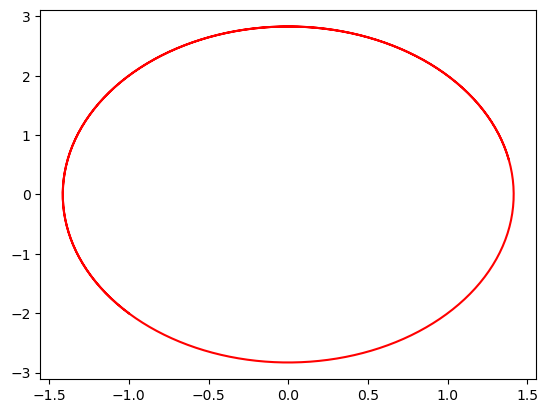

In [6]:
b = np.array([[-1.0],[-2.0]])
b_trajectory2 = b.copy()
for i in range(500):
    b = trapezoid_method(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), b, 0.01)
    b_trajectory2 = np.hstack((b_trajectory2, b))

plt.plot(b_trajectory2[0],b_trajectory2[1],'r')
plt.show()

## Question 1.d

Now generate a 5000-point trajectory of the same ODE system from $[x(t = 0), v(t = 0)]^T = [-1, -2]^T$ with a time step of $\Delta t = 0.01$.

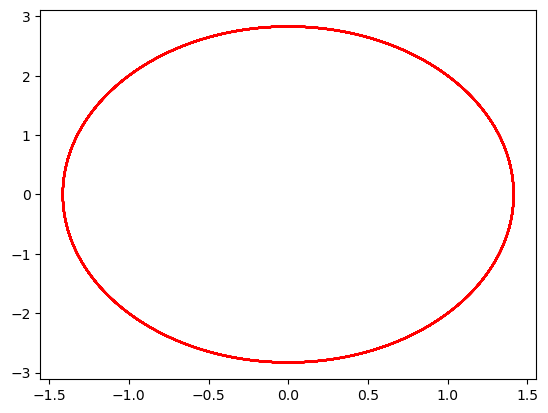

In [7]:
d = np.array([[-1.0],[-2.0]])
d_trajectory2 = d.copy()
for i in range(5000):
    d = trapezoid_method(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), d, 0.01)
    d_trajectory2 = np.hstack((d_trajectory2, d))

plt.plot(d_trajectory2[0],d_trajectory2[1],'r')
plt.show()

## Question 2

Coding up my own version of fourth-order Runge-Kutta

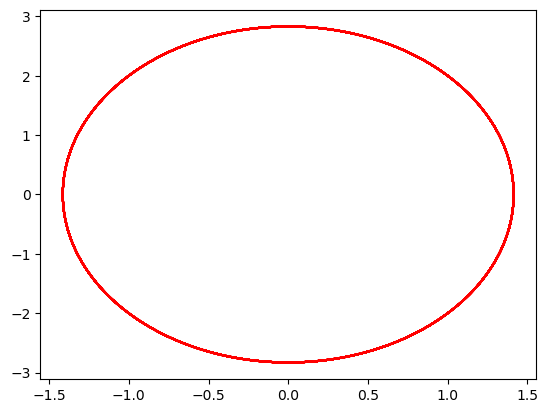

In [8]:
def RK4(f, x_0, h):
    k1 = f(x_0)
    k2 = f(x_0 + (h*k1)/2)
    k3 = f(x_0 + (h*k2)/2)
    k4 = f(x_0 + h*k3)
    return(x_0 + (h/6)*(k1 + 2*k2 + 2*k3 + k4))

c = np.array([[-1.0],[-2.0]])
c_trajectory = c.copy()
for i in range(5000):
    c = RK4(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), c, 0.01)
    c_trajectory = np.hstack((c_trajectory, c))

plt.plot(c_trajectory[0],c_trajectory[1],'r')
plt.show()

#### testing

In [11]:
td = np.array([[-1.0],[-2.0]])
for i in range(10):
    td = trapezoid_method(lambda x: np.array([[x[1,0]],[-4.0*x[0,0]]]), td, 0.05)
    print(0.05*(i+1), ":\n", td)

0.05 :
 [[-1.095]
 [-1.79 ]]
0.1 :
 [[-1.179025]
 [-1.56205 ]]
0.15000000000000002 :
 [[-1.25123238]
 [-1.31843475]]
0.2 :
 [[-1.31089795]
 [-1.0615961 ]]
0.25 :
 [[-1.35742327]
 [-0.79410853]]
0.30000000000000004 :
 [[-1.39034158]
 [-0.51865333]]
0.35000000000000003 :
 [[-1.40932253]
 [-0.23799175]]
0.4 :
 [[-1.41417551]
 [ 0.04506271]]
0.45 :
 [[-1.4048515]
 [ 0.3276725]]
0.5 :
 [[-1.38144361]
 [ 0.60700444]]
